In [1]:
# 1. Chargement et Prétraitement des Données

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Charger le dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
column_names = ["age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", 
                "oldpeak", "slope", "ca", "thal", "target"]
df = pd.read_csv(url, names=column_names)

# Remplacer les '?' par NaN et convertir les colonnes en float
df.replace("?", np.nan, inplace=True)
df = df.astype(float)

# Suppression des valeurs manquantes
df.dropna(inplace=True)

# Correction de la variable target (1 = maladie, 0 = pas de maladie)
df["target"] = (df["target"] > 0).astype(int)

# Afficher un aperçu des données
print(df.head())


    age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0  63.0  1.0  1.0     145.0  233.0  1.0      2.0    150.0    0.0      2.3   
1  67.0  1.0  4.0     160.0  286.0  0.0      2.0    108.0    1.0      1.5   
2  67.0  1.0  4.0     120.0  229.0  0.0      2.0    129.0    1.0      2.6   
3  37.0  1.0  3.0     130.0  250.0  0.0      0.0    187.0    0.0      3.5   
4  41.0  0.0  2.0     130.0  204.0  0.0      2.0    172.0    0.0      1.4   

   slope   ca  thal  target  
0    3.0  0.0   6.0       0  
1    2.0  3.0   3.0       1  
2    2.0  2.0   7.0       1  
3    3.0  0.0   3.0       0  
4    1.0  0.0   3.0       0  


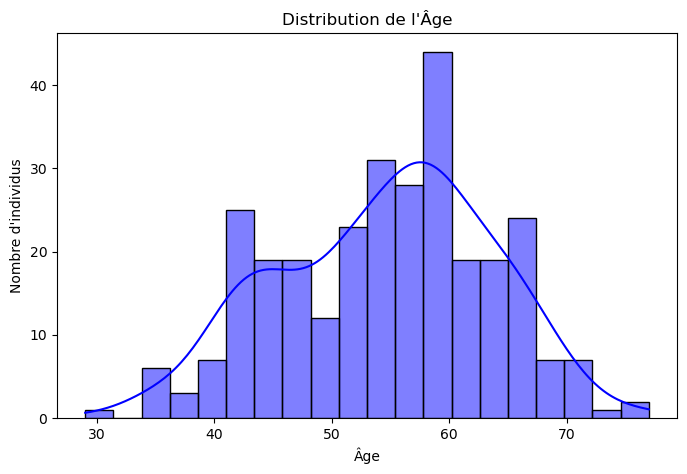

In [3]:
# 2. Distribution de l'Âge des Individus
plt.figure(figsize=(8,5))
sns.histplot(df["age"], bins=20, kde=True, color='blue')
plt.xlabel("Âge")
plt.ylabel("Nombre d'individus")
plt.title("Distribution de l'Âge")
plt.show()


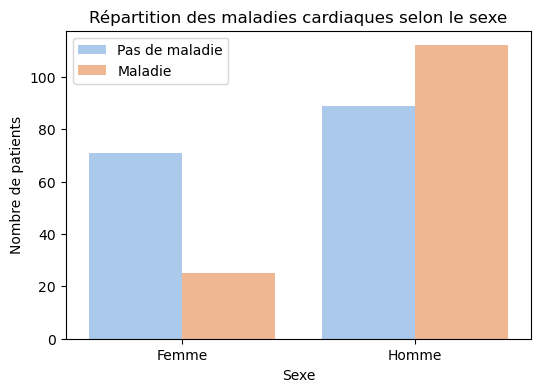

In [5]:
# 3. Différence dans la Présence de Maladie Cardiaque Entre les Sexes
plt.figure(figsize=(6,4))
sns.countplot(x="sex", hue="target", data=df, palette="pastel")
plt.xticks(ticks=[0, 1], labels=["Femme", "Homme"])
plt.xlabel("Sexe")
plt.ylabel("Nombre de patients")
plt.title("Répartition des maladies cardiaques selon le sexe")
plt.legend(["Pas de maladie", "Maladie"])
plt.show()


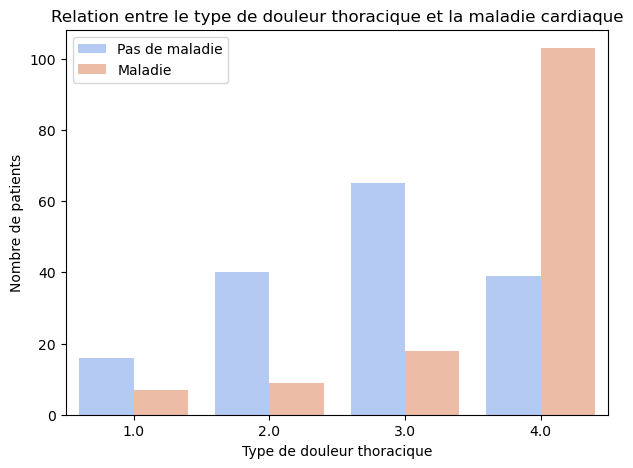

In [9]:
# 4. Relation entre le Type de Douleur Thoracique (cp) et la Maladie Cardiaque
plt.figure(figsize=(7,5))
sns.countplot(x="cp", hue="target", data=df, palette="coolwarm")
plt.xlabel("Type de douleur thoracique")
plt.ylabel("Nombre de patients")
plt.title("Relation entre le type de douleur thoracique et la maladie cardiaque")
plt.legend(["Pas de maladie", "Maladie"])
plt.show()


In [11]:
# 5. Moyennes des Variables Clés pour les Patients Malades et Non Malades
df.groupby("target")[["trestbps", "chol", "thalach"]].mean()


,trestbps,chol,thalach
target,,,
0,129.175000,243.493750,158.581250
1,134.635036,251.854015,139.109489


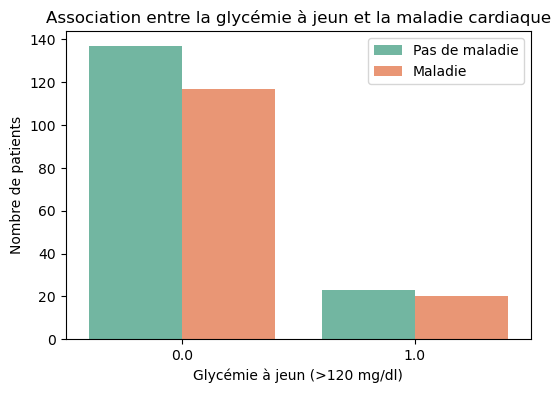

In [13]:
# 6. Association entre la Glycémie à Jeun (> 120 mg/dl) et la Maladie Cardiaque
plt.figure(figsize=(6,4))
sns.countplot(x="fbs", hue="target", data=df, palette="Set2")
plt.xlabel("Glycémie à jeun (>120 mg/dl)")
plt.ylabel("Nombre de patients")
plt.title("Association entre la glycémie à jeun et la maladie cardiaque")
plt.legend(["Pas de maladie", "Maladie"])
plt.show()




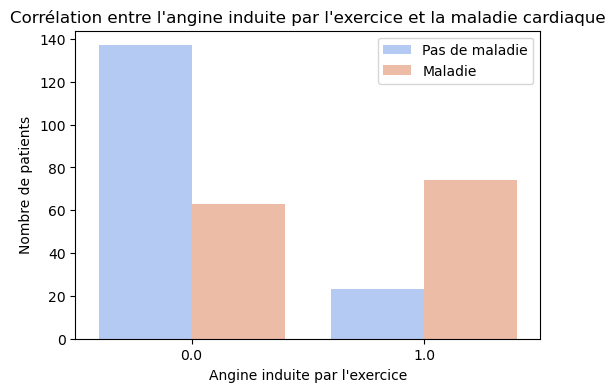

In [15]:
# 7. Corrélation entre l'Angine Induite par l'Exercice et la Maladie Cardiaque
plt.figure(figsize=(6,4))
sns.countplot(x="exang", hue="target", data=df, palette="coolwarm")
plt.xlabel("Angine induite par l'exercice")
plt.ylabel("Nombre de patients")
plt.title("Corrélation entre l'angine induite par l'exercice et la maladie cardiaque")
plt.legend(["Pas de maladie", "Maladie"])
plt.show()
